In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("mnist_train.csv")

In [3]:
ds1=pd.read_csv("mnist_test.csv")

In [4]:
ds.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ds1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l=ds["label"]
d=ds.drop("label",axis=1)

In [7]:
d.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
d.shape

(60000, 784)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


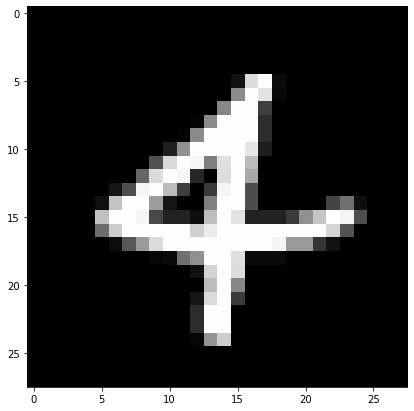

In [9]:
plt.figure(figsize=(7,7))
index=150
grid_data=d.iloc[index]
print(type(grid_data))
ss=np.array(grid_data)
print(type(ss))
sd=ss.reshape(28,28)
print(type(sd))
#print(sd)

plt.imshow(sd,cmap="gray")
plt.show()

In [10]:
print(l[index])

4


In [11]:
labels=l.head(15000)

In [12]:
data=d.head(15000)

In [13]:
data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.shape

(15000, 784)

In [15]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(data)
std_data.shape

(15000, 784)

In [16]:
cov_mat=np.matmul(std_data.T,std_data)
cov_mat.shape

(784, 784)

In [17]:
from scipy.linalg import eigh
values,vectors=eigh(cov_mat,eigvals=(782,783))
vectors.shape

(784, 2)

In [18]:
new_data=np.matmul(std_data,vectors).T
new_data.shape

(2, 15000)

In [19]:
labels.shape

(15000,)

In [20]:
new_d=np.vstack((new_data,labels)).T

In [21]:
new_d

array([[-4.45704983,  0.96076924,  5.        ],
       [-7.39779508, -8.65815498,  0.        ],
       [ 9.64068954, -2.0828543 ,  4.        ],
       ...,
       [ 1.12527157,  5.75309962,  7.        ],
       [-0.02666788,  7.39420531,  1.        ],
       [ 1.83171889,  5.47713446,  7.        ]])

In [22]:
new_dt=pd.DataFrame(data=new_d,columns=("1st_principal","2nd_principal","labels"))
new_dt.head()

,1st_principal,2nd_principal,labels
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


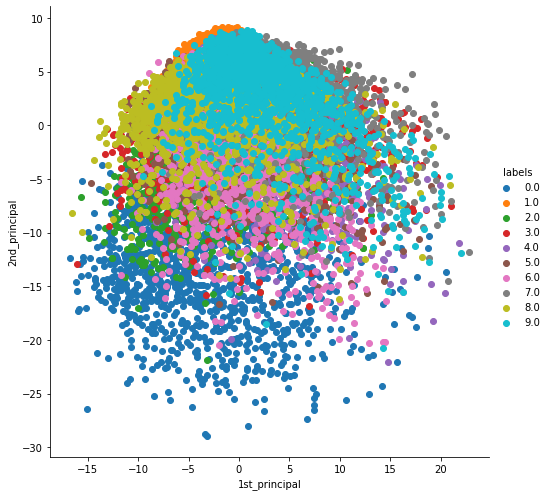

In [23]:
sns.FacetGrid(new_dt,hue="labels",height=7).map(plt.scatter,"1st_principal","2nd_principal").add_legend()

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(std_data)

In [25]:
pca_data=np.vstack((pca_data.T,labels)).T

In [26]:
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","labels"))

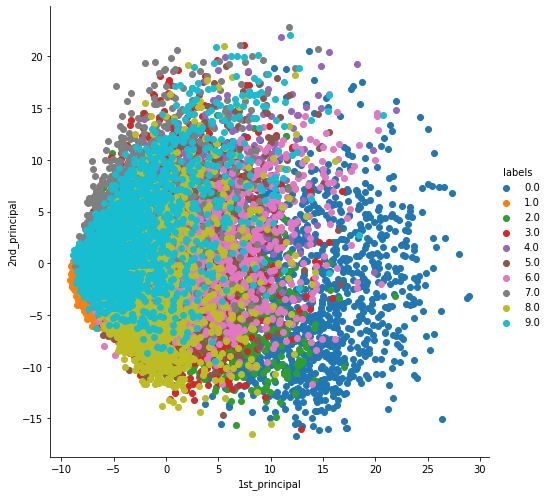

In [27]:
sns.FacetGrid(pca_df,hue="labels",height=7).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

In [28]:
pc=PCA(n_components=784)
pc_data=pc.fit_transform(std_data)

In [29]:
p_v_e=pc.explained_variance_/np.sum(pc.explained_variance_)

In [30]:
c_v_e=np.cumsum(p_v_e)

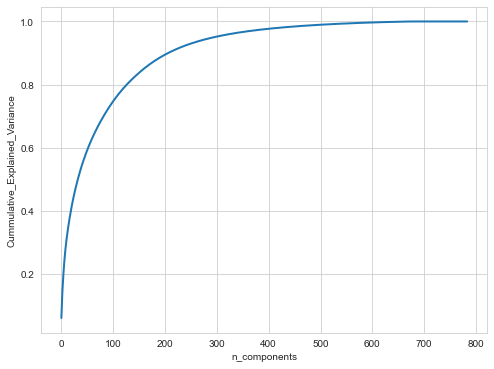

In [31]:
# We plot a graph to see how many number of components covers how much amount of data
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.plot(c_v_e,linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cummulative_Explained_Variance")
plt.show()

In [ ]:
# Components in the range of 500-550 are suuficient to explain 100 percent data variance